<a href="https://colab.research.google.com/github/Jalalbaim/Forest-Cover-Classifier/blob/main/CoverType_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forest Cover Classifier**

- In this project, we will use deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables.


## **1- Preprocess and explore the dataset**
***
- The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data.
- The covertypes are the following:

  * Spruce/Fir
  * Lodgepole Pine
  * Ponderosa Pine
  * Cottonwood/Willow
  * Aspen
  * Douglas-fir
  * Krummholz




In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!pip install --upgrade scikit-learn

In [77]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
path = "/content/drive/MyDrive/dlsp-portfolio-starter-code/dlsp-portfolio-starter-code/cover_data.csv"
df = pd.read_csv(path)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [80]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [81]:
columns = df.columns
columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [82]:
for col in list(columns):
  print(df[col].value_counts())
  print("*******************************")

2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
        ... 
3779       1
1912       1
3659       1
3771       1
3852       1
Name: Elevation, Length: 1978, dtype: int64
*******************************
45     6308
0      4914
90     4677
135    3834
63     3680
       ... 
269     625
244     587
224     506
226     499
360      51
Name: Aspect, Length: 361, dtype: int64
*******************************
11    33824
10    33812
12    33217
13    32419
9     32049
      ...  
65        2
58        1
64        1
63        1
66        1
Name: Slope, Length: 67, dtype: int64
*******************************
30      34139
0       24603
150     20785
60      19189
67      15223
        ...  
1397        1
1370        1
1355        1
1356        1
1312        1
Name: Horizontal_Distance_To_Hydrology, Length: 551, dtype: int64
*******************************
 0      38665
 3       9298
 10      8863
 7       8741
 6       8590
        ...  
 583        1
 582        1
 522       

In [83]:
for col in list(columns):
  print(df[col].describe())
  print("*******************************")

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64
*******************************
count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64
*******************************
count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64
*******************************
count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64
************************

### Exploratory data analysis :
- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to
nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer solstice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

### **Train Test split**



In [84]:
df_data = df.values
X, y = df_data[:, : -1], df_data[:, -1]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =y,random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2- Model building

In [87]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import Adam

In [88]:
# building model
model = Sequential()
model.add(Dense(64, input_dim = len(columns)-1, activation ='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax', name='classifier'))

In [89]:
model.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                3520      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 classifier (Dense)          (None, 8)                 264       
                                                                 
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________


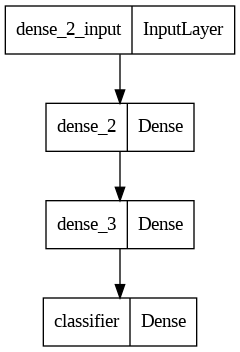

In [91]:
from keras.utils import plot_model

plot_model(model)

### **Fitting the model**

In [92]:
history = model.fit(X_train_scaled,
                    y_train,
                    epochs= 100,
                    batch_size =64,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
6537/6537 [==============================] - 38s 6ms/step - loss: 0.5739 - accuracy: 0.7546 - val_loss: 0.5062 - val_accuracy: 0.7800
Epoch 2/100
6537/6537 [==============================] - 49s 7ms/step - loss: 0.4790 - accuracy: 0.7941 - val_loss: 0.4569 - val_accuracy: 0.8058
Epoch 3/100
6537/6537 [==============================] - 34s 5ms/step - loss: 0.4454 - accuracy: 0.8099 - val_loss: 0.4346 - val_accuracy: 0.8170
Epoch 4/100
6537/6537 [==============================] - 26s 4ms/step - loss: 0.4244 - accuracy: 0.8205 - val_loss: 0.4337 - val_accuracy: 0.8182
Epoch 5/100
6537/6537 [==============================] - 38s 6ms/step - loss: 0.4102 - accuracy: 0.8271 - val_loss: 0.4121 - val_accuracy: 0.8289
Epoch 6/100
6537/6537 [==============================] - 36s 6ms/step - loss: 0.3997 - accuracy: 0.8318 - val_loss: 0.3951 - val_accuracy: 0.8360
Epoch 7/100
6537/6537 [==============================] - 32s 5ms/step - loss: 0.3898 - accuracy: 0.8370 - val_loss: 0.3915 -

### Evaluating the model
***

True

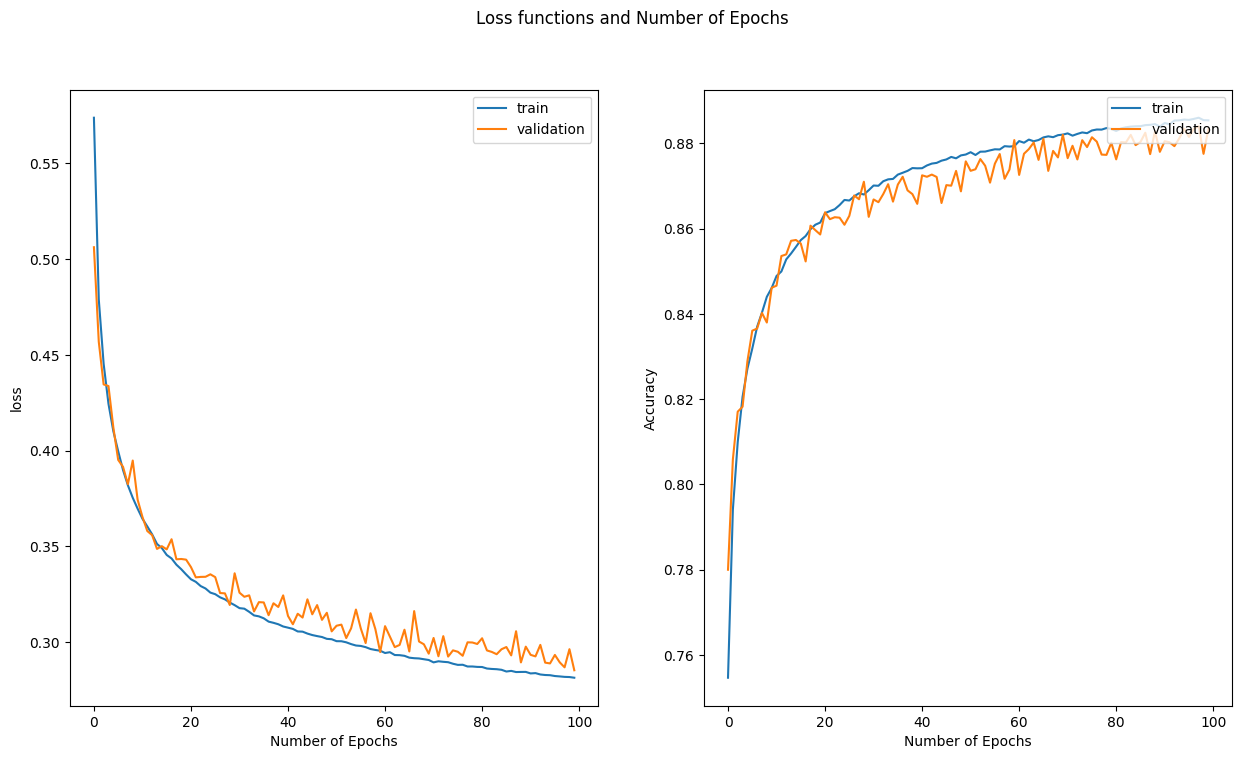

In [93]:
def loss_graphs(history):

  fig, axs = plt.subplots(1,2, figsize=(15, 8))
  plt.suptitle('Loss functions and Number of Epochs')
  (ax1, ax2) = axs

  #1st plot : loss vs epochs
  ax1.plot(history.history['loss'], label='train')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.legend(loc="upper right")
  ax1.set_xlabel('Number of Epochs')
  ax1.set_ylabel('loss')

  #2nd plot : accuracy vs epochs
  ax2.plot(history.history['accuracy'], label='train')
  ax2.plot(history.history['val_accuracy'], label='validation')
  ax2.legend(loc="upper right")
  ax2.set_xlabel('Number of Epochs')
  ax2.set_ylabel('Accuracy')

  return True

loss_graphs(history)

In [94]:
from sklearn.metrics import classification_report,  confusion_matrix, f1_score
import seaborn as sns

class_names = ['Spruce/Fir', 'Lodgepole Pine',
                'Ponderosa Pine', 'Cottonwood/Willow',
                'Aspen', 'Douglas-fir', 'Krummholz']

def classification__report():

  score = model.evaluate(X_test_scaled, y_test, verbose=1)

  print(f'Test loss: {score[0]}')
  print('The accuracy or how often the predictions match the labels is ' + f'{score[1]*100:.{0}f}' + '%')
  y_pred = model.predict(X_test_scaled)
  print('The predicted values are:')
  print(np.argmax(y_pred, axis=1))
  print('')
  print('The actual values are:')
  print(y_test)
  print('')
  preds =  np.argmax(y_pred, axis=1)
  print(classification_report(y_test, preds, target_names= class_names))

classification__report()

3632/3632 [==============================] - 9s 3ms/step - loss: 0.2848 - accuracy: 0.8857
Test loss: 0.28479281067848206
The accuracy or how often the predictions match the labels is 89%
3632/3632 [==============================] - 5s 1ms/step
The predicted values are:
[1 3 3 ... 1 2 2]

The actual values are:
[1 3 2 ... 2 2 2]

                   precision    recall  f1-score   support

       Spruce/Fir       0.88      0.88      0.88     42368
   Lodgepole Pine       0.90      0.91      0.90     56661
   Ponderosa Pine       0.86      0.90      0.88      7151
Cottonwood/Willow       0.86      0.67      0.75       549
            Aspen       0.84      0.54      0.65      1899
      Douglas-fir       0.77      0.78      0.77      3473
        Krummholz       0.90      0.90      0.90      4102

         accuracy                           0.89    116203
        macro avg       0.86      0.80      0.82    116203
     weighted avg       0.89      0.89      0.88    116203



3632/3632 [==============================] - 5s 2ms/step


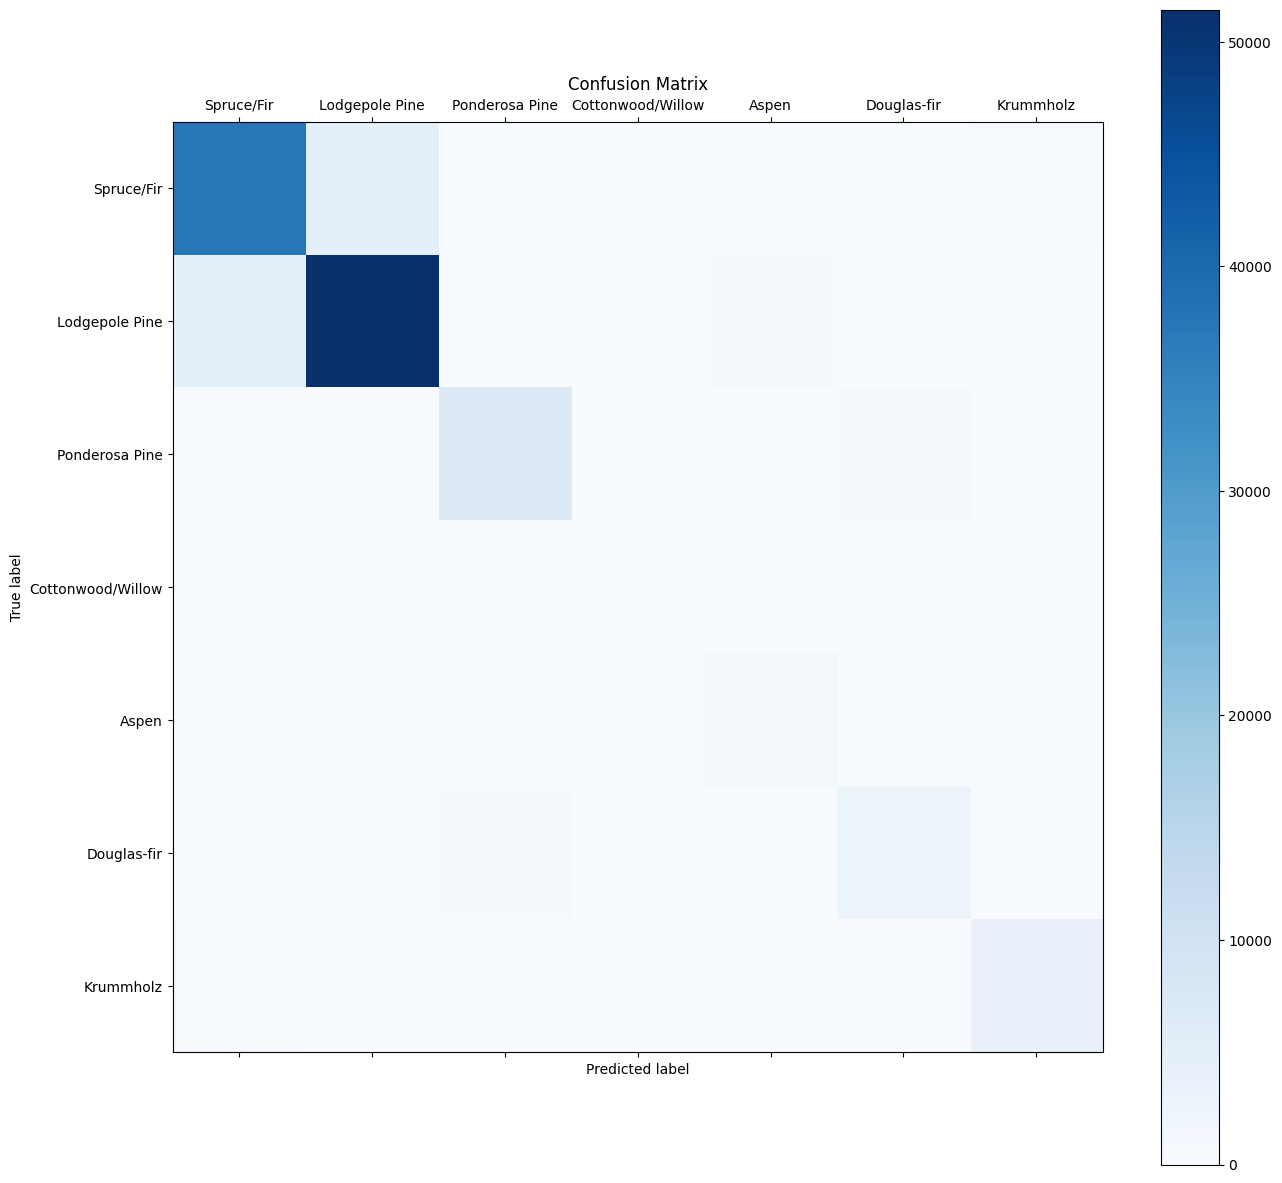

In [95]:
def confusion__matrix():
  preds = model.predict(X_test_scaled)
  preds = np.argmax(preds, axis=1)

  cm = confusion_matrix(preds,y_test)

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  fig, ax = plt.subplots(figsize=(15,15))
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(7), # create enough axis slots for each class
         yticks=np.arange(7),
         xticklabels=class_names, # axes will labeled with class names (if they exist) or ints
         yticklabels=class_names)

confusion__matrix()

# **THE END**